---   

<h1 align="center">Introduction to Data Analyst and Data Science for beginners</h1>
<h1 align="center">Lecture 4.4(Web Scraping using Selenium - II)</h1>

---
<h3><div align="right">Ehtisham Sadiq</div></h3>    

<img align="center" width="1100"   src="images/selenium-II_review.png"  >

<img align="right" width="300" src="images/webscraping.png"  >
<br><br><br>

## Learning agenda of this notebook

**Recap of Previous Session**


- **Best Practices for Web Scraping & Some Points to Ponder**


- **Example 1:** Searching and Downloading Images for ML Classification:https://google.com



- **Example 2:** Scraping Comments from a YouTube Video for NLP:https://www.youtube.com/watch?v=mHONNcZbwDY


- **Example 3:** Scraping Jobs from a Job Website: https://pk.indeed.com


- **Example 4:** Scraping Tweets of a celebirty: https://twitter.com/login


- **Example 5:** Scraping News Articles for a News Website: https://www.thenews.com.pk/today


- **Exercise:**


## Best Practices for Web Scraping & Some Points to Ponder

### a. Check if Website is Changing Layouts and use Robust Locators
- Locating correct web element is a pre-requiste of web scraping. 
- We can use ID, Name, Class, Tag, LinkText and PartialLinkText to locate web elements in Selenium.
- In dynamic environments the web elements mostly donot have consistent attribute values, therefore, finding a unique static attribute is quite a tricky task. Hence directly using above mentioned six selenium locators might not be able to uniquely identify a web element..
- So in such situations CSS-Selector and XPATH should be preferred.

#### CSS SELECTOR
- Basic Syntax: `tag[attribute='value']`
- Using ID: `input[id='username']`  or     `input#username`
- Using Class: `input[class='form-control']`  or     `input.form-control`
- Using any attribute: `input[any-attr='attr-value']` 
- Combining attributes: `input.form-control[attr='value']`
- Using Parent/Child Hierarchy: 
    - Basic Syntax: `parent-locator > child-locator`
    - Direct Parent/Child: `div > input[attr = 'value']`

#### XPATH SELECTOR
- Basic Example:
    - Absolute XPATH: `/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input`
    - Relative XPATH: `//input[@title='Search']`
- For dyanmic websites using simple XPATH might return multiple elements. To write effective XPATHS, one can use XPATH functions to identify elements uniquely:
    - Using contains(): `//input[contains(@id, 'userN')]`  or  `//input[@id, 'userNname']`
    - Using starts-with(): `//tagname[starts-with(@attribute, 'initial partial value of attribute')]`
    - Using text(): `//input[text() = 'text of the element')]`
- You can use AND & OR operators to identify an element by combining two different conditions or attributes:
    - Using and: `//tagname[@name='value' and @id='value']`
    - Using or: `//tagname[@name='value' or @id='value']`
- You can use XPATH Axis, which use the relationship between various nodes to locate a web element in the DOM structure:
    - `ancestor`: Locates ancestors of current node, which includes the parents upto the root node.
    - `descendant`: Locates descendants of current node, which includes the children upto the leaf node.
    - `child`: Locates the children of current node.
    - `parent`: Locates parent of the current node.

### b. Wait for the WebElement to be Displayed Before you Start Scraping
- These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. This makes locating elements difficult: if an element is not yet present in the DOM, a locate function will raise an ElementNotVisibleException. 
- One can use `time.sleep(10)` to make our script wait for exact 10 seconds before proceeding. One should avoid using these static wait statements rather should use the dynamic waits provided by Selenium Webdriver.
- Many times the web elements are not interactable, not clickable, or not visible, and thats where you have to put the wait so that the page gets loaded and your script can find that particular web element and proceed further.
    - **Implicit wait:**
        - Implicit wait applies to all the Web Elements in the test script
        - In implicit wait you specify a time out and your script wait for all the web elements to be loaded or raises an exception if the time expires.
        - Example: The `driver.implicitly_wait(30)` will wait for a maximum of 30 seconds before throwing a timeout exception. If all the web elements are available before 30 seconds, control will move to the next LOC.
        
     - **Explicit wait:**
        - Explicit wait is used to wait for a specific web element.
        - In explicit wait, other than specifying the time out, you also specify a condition to be checked, like checking if the element is visible, or clickable and so on.
        - Example: The `element = WebDriverWait(driver, 30).until(EC.presence_of_element_located(By.XPATH, 'xpath'))` will wait for a maximum of 30 seconds before throwing a timeout exception. If the specific web element becomes visible within 30 seconds, control will move to the next LOC.
    
    - **Fluent Wait** is quite similar to explicit wait, where you can specify the polling frequency. See Selenium documentations for details: https://www.selenium.dev/documentation/webdriver/waits/

### c. Robots Exclusion Protocol
- The robots exclusion protocol or simply `robots.txt`, is a standard used by websites to communicate with web crawlers/bots, informing them about which areas of the website can be scanned or scraped. 
- The `robots.txt` file is mostly placed in a website's top level directory and is publically available. A sub-domain on a root domain can also have separate `robots.txt` files.
-  The `robots.txt` file provides instructions for bots, however, it can't actually enforce the instructions.
- So a good bot follows those instructions, while a bad bot ignore them.

### d. Do not Hammer the Webserver 
- Web scraping bots fetch data very fast, so it is easy for a website to detect your scraper.
- So to make sure that your bot donot hammer the webserver by sending too many request in a very short span of time, you need to put some random programmatic sleep calls `time.sleep(2)` in between requests. 

### e. Avoid Scraping Data Behind Login
- If a page is protected by login, the scraper would have to send some information or cookies along with each request to view the page. 
- So be watchful, if you get caught, your account might get blocked.

### f. Do not Follow Same Crawling Pattern
- When humans browse a website, they have different view time, they are slow, and they perform random clicks. On the contrary bots are very fast and follow the same/fixed browsing pattern.
- Some websites have intelligent anti-crawling mechanisms to detect spiders and may block your IP and you can no more visit that website.
- A simple solution is to incorporate some random clicks on the page, mouse movements and random actions that will make your bot look like a human.

### g. Beware of Honey Pots
- Honeypots are systems that are used to lure hackers and detect any scraping attempts that try to gain information.
- Some websites install honeypots, which are links invisible to normal users with color disguised to blend in with the page’s background color. But can be seen by bots and therefore one of the reasons to get caught.
- So make sure that your bot take care that the link has proper visibility with no nofollow tag.

### h. Rotate User-Agents
- Every request made from a web browser contains a user-agent header, and if the user agent is not set, websites won’t let you view content.
- Using the same user-agent consistently leads to the detection of a bot. 
- The only way to make your User-Agent appear more real and bypass detection is to fake the user agent.
> You can get your User-Agent by typing `what is my user agent` in Google’s search bar. 

### i. Make Requests through Proxies and Rotate Them as Needed
- When scraping blindlessly, multiple requests coming from the same IP will lead you to get blocked
- So better scrap from behind a proxy server, so the target website will not know where the original IP is from, making the detection harder.
- There are several methods that can change your outgoing IP
    - TOR
    - VPNs
    - Free Proxies
    - Shared Proxies
    - Private Proxies
    - Data Center Proxies
    - Residential Proxies
> You can get your IP by typing `what is my ip` in Google’s search bar.

### j. Use CAPTCHA Solving Services
- Many websites use CAPTCHAs to keep bots out of their websites.
- If you want to scrape websites that use CAPTCHAs, you can use CAPTCHA services to get past these restrictions.
    - https://2captcha.com/
    - https://anti-captcha.com/
    - https://pypi.org/project/pytesseract/0.1/

## Example 1: Searching and Downloading Images for ML Classification:https://google.com

### a. Search and Load the Images of Cats

In [3]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

#Create an instance of webdriver and load the google webpage
s = Service('/Users/arif/Documents/chromedriver')
myoptions = Options()
myoptions.headless = False # default settings
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
driver.get('https://google.com') 


# locate the search textbox, enter the search string and  press enter key
driver.implicitly_wait(30)
#tbox = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
#tbox = driver.find_element(By.XPATH, "//input[@title='Search']")
tbox = driver.find_element(By.CSS_SELECTOR, "input[title='Search']")
tbox.send_keys("Cat")


# Instead of locating and clicking the search button, you can simplay press enter
time.sleep(2)
tbox.send_keys(Keys.ENTER) 


# Locate the image tab and click it to visit the images tab
driver.implicitly_wait(30)
#menu_img_link = driver.find_element(By.XPATH, '/html/body/div[7]/div/div[4]/div/div[1]/div/div[1]/div/div[2]/a')
menu_img_link = driver.find_element(By.XPATH, '//*[@id="hdtb-msb"]/div[1]/div/div[2]/a')
menu_img_link.click()

### b. Self-Scroll to the Bottom of the Webpage
- Create an instance of WebDriver
- The `driver.execute_script(JS)` method is used to synchronously execute JavaScript in the current window/frame.
```
driver.execute_script('alert("Hello JavaScript")')
```
- The `window.scrollTo()` method is used to perform scrolling operation. The pixels to be scrolled horizontally along the x-axis and pixels to be scrolled vertically along the y-axis are passed as parameters to the method.

In [4]:
# Self-Scroll the entire page till you reach the bottom
last_height =driver.execute_script('return document.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(4)
    new_height =driver.execute_script('return document.body.scrollHeight')
    if (new_height == last_height):
        break
    last_height = new_height

print("Done... Reached the bottom of the page")

Done... Reached the bottom of the page


### c. Save the Images by using the `screenshot()` method
- Two ways to take a screenshot:
    - `driver.save_screenshot(filename)` Saves a screenshot of the current window to a PNG image file and returns a bool value

    - `element.screenshot(filename)` saves a screenshot of the current element to a PNG image file and  Returns a bool value

In [5]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# downlaod and save 40 images of cats
for i in range(1,41):
    try:
        WebDriverWait(driver, 5).until
        (EC.presence_of_element_located((By.XPATH, '//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img'))) 
        cat_img = driver.find_element(By.XPATH, '//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img')
        cat_img.screenshot('/Users/arif/Downloads/cat_images/cat_img'+str(i)+'.png')
    except:
        continue

print("Done... Check the folder for images of cats")

Done... Check the folder for images of cats


In [6]:
driver.quit()

In [7]:
!ls /Users/arif/Downloads/cat_images

cat_img1.png  cat_img17.png cat_img24.png cat_img32.png cat_img4.png
cat_img10.png cat_img18.png cat_img26.png cat_img33.png cat_img40.png
cat_img11.png cat_img19.png cat_img27.png cat_img34.png cat_img5.png
cat_img12.png cat_img2.png  cat_img28.png cat_img35.png cat_img6.png
cat_img13.png cat_img20.png cat_img29.png cat_img36.png cat_img7.png
cat_img14.png cat_img21.png cat_img3.png  cat_img37.png cat_img8.png
cat_img15.png cat_img22.png cat_img30.png cat_img38.png cat_img9.png
cat_img16.png cat_img23.png cat_img31.png cat_img39.png


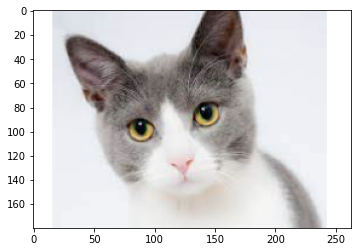

In [8]:
from matplotlib import image
from matplotlib import pyplot as plt

img1 = image.imread("/Users/arif/Downloads/cat_images/cat_img20.png")
plt.imshow(img1);

## Example 2: Scraping Comments from a YouTube Video
- https://www.youtube.com/watch?v=mHONNcZbwDY&t=80s

In [10]:
driver.quit()

In [11]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

#Create an instance of webdriver and load/run the youtube video page
s = Service('/Users/arif/Documents/chromedriver')
myoptions = Options()
myoptions.headless = False # default settings
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
time.sleep(1)
driver.get('https://www.youtube.com/watch?v=mHONNcZbwDY&t=80s')
driver.implicitly_wait(30)
play = driver.find_element(By.XPATH, '//*[@id="movie_player"]/div[5]/button')
play.click()

# Perform three scrolls to get around 60 comments
for scroll in range(1, 4):   
    body = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    body.send_keys(Keys.END)
    time.sleep(12)
    

# Scrape the comments
comments = []
comments_list = driver.find_elements(By.CSS_SELECTOR,"#content-text" )
for comment in comments_list:
    text = comment.text.strip()
    comments.append(text)

# Scrape the authors who made the comments
authors = []
authors_list = driver.find_elements(By.ID,"author-text")
for author in authors_list:
    text = author.text.strip()
    authors.append(text)

# Save the comments in csv file
data = {'Authors':authors, 'Comments':comments}
df = pd.DataFrame(data, columns=['Authors', 'Comments'])
df.to_csv('hello.csv', index=False)

Authors  \
0                                  NaN   
1                       Logene Temonio   
2                   Joelfantastic ASMR   
3                                  NaN   
4                                Sofia   
5                        Daiane Santos   
6                                  NaN   
7                        Marcia Corbin   
8                           Music Mane   
9                             dlnnyc64   
10               Edmar Fernandes Couto   
11                       Yancy Johnson   
12  Maria Rosa Helena Do Prado E Silva   
13                        Nina Schimel   
14                       Ceciliasantos   
15                      Sra. Francisco   
16               João Marcos Rodrigues   
17                          Billyn Ivy   
18                          Cicada3301   
19                        Carmen Bazan   
20                                 NaN   
21                           Elnadrion   
22                     Volnei Carvalho   
23                           adeyosola   
24                        Thisura Yapa   
25                        Luis Machado   
26                      DachshundsRule   
27        Lourdes. Conceicaodossantos.   
28                          Rita Silva   
29                            drharshz   
30                       Sherry George   
31            Gabriel apaixonado music   
32                    Angela Arrington   
33                        Marcos Pinto   
34                     Андрей Баздырев   
35                       Denise Hedden   
36                          Saif Messi   
37                     joshua jennings   
38                        Joel Jimenez   
39                     Vilmara Reghini   

                                             Comments  
0                    You're an absolute legend Lionel  
1   It's 2022 and I'm listening to this Masterpiece ♡  
2   Going on 40 and this song is still one of my t...  
3                                                   ️  
4   2022 and i'm still addicted to this LEGENDARY ...  
5   Sou fã do Lionel \nEle tem uma voz linda\nViva...  
6   Um anjo está cantando. Uma pausa para alegrar ...  
7   Beautiful words...beautiful music...beautiful ...  
8   This masterpiece gives me teary eyes every tim...  
9   Still hits close to the heart almost 40 years ...  
10  Isso que é música de valor.... muito sensivel ...  
11       It’s 2022 and THIS SONG STILL GOES STRONG!!!  
12                             Que hino!!!!!! Amooooo  
13  Ano de 1984\nSó eu sei o que representa essa c...  
14                                Eu amo este clipe ️  
15  Um dos clipes mais belos do mundo! Sinto-me en...  
16  Essa canção é emocionante, Lionel Richie é uma...  
17  Don’t worry you’re not the the only one listen...  
18  Masterpiece. simply no words can describe the ...  
19  One morning in 1984 I was getting ready for wo...  
20  I don’t care what I’m doing, whenever this son...  
21  Um anjo está cantando. Uma pausa para alegrar ...  
22  Como estás músicas são perfeitas lembra da min...  
23  Lionel Richie is one of the best song writers ...  
24  That guitar solo is next level.  No wonder tha...  
25                                       Linda demais  
26  This song brings me to tears, it was our song....  
27                      Amei essa cena, muito liinda!  
28  Lionel Richie você é o cara.charmoso maravilho...  
29  2022 ..... This is golden! One of the best eve...  
30  I grew up in the 80's. Some of the best music ...  
31                                       Música linda  
32  It's 2022,and I'm listening.never get tired of...  
33  Tempo excelente que não volta mais  maravilhos...  
34  As they say, this song is for all time! It is ...  
35  2022 and I'm still listening to Lionel Richie....  
36  It's simply an eternal song and it will still ...  
37  So many memories of this song ..a masterpiece ...  
38  This song is enchanting and touches the soul. ...  
39  Essa música faz parte da minha infância , meu ...

In [12]:
driver.quit()

In [2]:
import pandas as pd
df = pd.read_csv('hello.csv')
pd.set_option('max_colwidth',150)
df

Authors  \
0                                  NaN   
1                       Logene Temonio   
2                   Joelfantastic ASMR   
3                                  NaN   
4                                Sofia   
5                        Daiane Santos   
6                                  NaN   
7                        Marcia Corbin   
8                           Music Mane   
9                             dlnnyc64   
10               Edmar Fernandes Couto   
11                       Yancy Johnson   
12  Maria Rosa Helena Do Prado E Silva   
13                        Nina Schimel   
14                       Ceciliasantos   
15                      Sra. Francisco   
16               João Marcos Rodrigues   
17                          Billyn Ivy   
18                          Cicada3301   
19                        Carmen Bazan   
20                                 NaN   
21                           Elnadrion   
22                     Volnei Carvalho   
23                           adeyosola   
24                        Thisura Yapa   
25                        Luis Machado   
26                      DachshundsRule   
27        Lourdes. Conceicaodossantos.   
28                          Rita Silva   
29                            drharshz   
30                       Sherry George   
31            Gabriel apaixonado music   
32                    Angela Arrington   
33                        Marcos Pinto   
34                     Андрей Баздырев   
35                       Denise Hedden   
36                          Saif Messi   
37                     joshua jennings   
38                        Joel Jimenez   
39                     Vilmara Reghini   

                                                                                                                                                 Comments  
0                                                                                                                        You're an absolute legend Lionel  
1                                                                                                       It's 2022 and I'm listening to this Masterpiece ♡  
2                                                                        Going on 40 and this song is still one of my top 10. Still gives me goose bumps!  
3                                                                                                                                                       ️  
4                                                                                                    2022 and i'm still addicted to this LEGENDARY SONG.️  
5                                   Sou fã do Lionel \nEle tem uma voz linda\nViva anos 70,80,90 tempos bons,com músicas boas.\nHoje em dia só porcarias.  
6                                                                             Um anjo está cantando. Uma pausa para alegrar o coração em tempos difíceis.  
7                                                                     Beautiful words...beautiful music...beautiful emotions...will always be timeless...  
8                                                                               This masterpiece gives me teary eyes every time, a pleasing pain and joy.  
9   Still hits close to the heart almost 40 years ago. I can remember details of where I was and what my life was back then. I adored the video but ca...  
10                                                                             Isso que é música de valor.... muito sensivel a pessoa q compôs essa letra  
11                                                                                                           It’s 2022 and THIS SONG STILL GOES STRONG!!!  
12                                                                                                                                 Que hino!!!!!! Amooooo  
13                                                                            Ano de 1984\nSó eu sei o que representa essa c

## Example 3: Scraping Jobs: 
- https://pk.indeed.com

In [13]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time


#Create an instance of webdriver and go the the appropriate job page
s = Service('/Users/arif/Documents/chromedriver')
myoptions = Options()
myoptions.headless = False 
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
driver.get('https://pk.indeed.com')
time.sleep(5)

# Enter your search parameters and click FindJobs button
what_box = driver.find_element(By.XPATH,'//*[@id="text-input-what"]')
where_box = driver.find_element(By.XPATH,'//*[@id="text-input-where"]')
button = driver.find_element(By.XPATH,'//*[@id="jobsearch"]/button')
what_box.send_keys('Full Stack Web Developer')
where_box.send_keys('Lahore')
button.click()
time.sleep(5)


# Function that scrape the three pieces of information of each job and is called on each page
jobtitles = []
companies = []
salaries = []
def jobs():
    time.sleep(2)
    postings = driver.find_elements(By.CSS_SELECTOR, '.resultContent') 
    for posting in postings: 
        try:
            job_title = posting.find_element(By.CSS_SELECTOR,'h2 a').text 
        except:
            job_title = 'No Job title'
        try:        
            company  = posting.find_element(By.CSS_SELECTOR,'.companyName').text
        except:
            company = "No company name"
        try:
            salary =  posting.find_element(By.CSS_SELECTOR,'.salary-snippet-container').text
        except:
            salary = "No Salary"        
        companies.append(company)
        salaries.append(salary)
        jobtitles.append(job_title)      


        
# Click the next page button in the pagination bar
while(True):
    time.sleep(4)
    try:
        pop_up = driver.find_element(By.CSS_SELECTOR,'.popover-x-button-close.icl-CloseButton')
        driver.find_element(By.CSS_SELECTOR,'.popover-x-button-close.icl-CloseButton').click()
    except:
        pass
    
    jobs()    
    
    try:    
        driver.find_element(By.CLASS_NAME,'pagination-list')
        driver.execute_script("arguments[0].scrollIntoView();", driver.find_element(By.CLASS_NAME,'pagination-list'))
        try:
            driver.find_element(By.XPATH,'//*[@aria-label="Next"]').click()
        except:
            break
    except:
        break



# # Writing in the file
data = {'Company':companies, 'Job Title':jobtitles, 'Salary':salaries}
df = pd.DataFrame(data, columns=['Company',  'Job Title', 'Salary'])
df.to_csv('jobs.csv', index=False)
df = pd.read_csv('jobs.csv')
df

Company  \
0     Smart Placement (Pvt) Ltd   
1            Digital Media Line   
2                     ThingTrax   
3            Alliance Solutions   
4                  iDig Digital   
..                          ...   
70  VeriPark Software Solutions   
71              Cinco Solutions   
72          FINCA International   
73           Nextbridge Pvt Ltd   
74           ENTERTAINER FZ LLC   

                                            Job Title  \
0                         Junior/Intern Web Developer   
1                                Web Developer Intern   
2                            Jr. Full Stack Developer   
3                                       Web Developer   
4   Full Stack PHP Laravel Developer - Remote Posi...   
..                                                ...   
70                            Software Developer. NET   
71                                     PHP Developers   
72                           Full Stack Web Developer   
73                              Senior MERN Developer   
74                       PHP Full Stack Web Developer   

                            Salary  
0                        No Salary  
1     Rs 5,000 - Rs 10,000 a month  
2                Rs 50,000 a month  
3                Rs 25,000 a month  
4   Rs 60,000 - Rs 126,159 a month  
..                             ...  
70                       No Salary  
71   Rs 30,000 - Rs 50,000 a month  
72                       No Salary  
73                       No Salary  
74                       No Salary  

[75 rows x 3 columns]

In [14]:
driver.quit()

## Example 4: Scraping: https://twitter.com/login

In [15]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import os

# Create an instance of webdriver and get the twitter login page
s = Service('/Users/arif/Documents/chromedriver')
myoptions = Options()
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
driver.get('https://twitter.com/login')   
driver.implicitly_wait(30)


# Enter username and password
time.sleep(5)
username = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@name="text"]'))) 
username.send_keys('username')
username.send_keys(Keys.ENTER) 
time.sleep(2)
passwd = WebDriverWait(driver, 30).until(EC.visibility_of_element_located((By.XPATH, '//input[@name="password"]')))
passwd.send_keys(os.environ['yourtwitterpassword']) # actual passwd is saved in an environment variable :)
passwd.send_keys(Keys.ENTER)


# Enter Celebrity name (Imran Khan) in Search Textbox
time.sleep(2)
search_input = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH,'//input[@aria-label="Search query"]')))
search_input.send_keys("Imran Khan")
time.sleep(2)
search_input.send_keys(Keys.ENTER)


## Click on People tab for People Profiles using LINK_TEXT Locator
time.sleep(2)
people = WebDriverWait(driver, 30).until(EC.visibility_of_element_located((By.LINK_TEXT, 'People')))
people.click()


# Click on the twitter link of Imran Khan
time.sleep(2)
click_imran = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.LINK_TEXT, 'Imran Khan')))
click_imran.click()


In [16]:
# Scrape username
user_name  = driver.find_element(By.XPATH,'((//*[@data-testid="UserName"])//span)[last()]').text

# Scrape 25 tweets with their dates
articles = []
tweets = []
times=[]

while True:
    time.sleep(1)
    article = driver.find_elements(By.TAG_NAME,'article')
    for a in article:
        if a not in articles:
            tweet = a.find_element(By.XPATH, './/*[@data-testid="tweetText"]')
            articles.append(a)
            t = a.find_element(By.XPATH,'.//time')
            times.append(t.text)
            tweets.append(tweet.text)
    if len(tweets) >=25:
        break
    driver.execute_script("window.scrollBy(0,500);")   

    
# Write scraped data in csv file
data = {'User':user_name, 'Times':times,'Tweets':tweets}
df = pd.DataFrame(data, columns=['User', 'Times','Tweets'])
df.to_csv('tweets.csv', index=False)
df = pd.read_csv('tweets.csv')
df

User   Times                                             Tweets
0   @ImranKhanPTI      1h  The nation continues to suffer crushing econom...
1   @ImranKhanPTI      1h  This was despite the sharp slow down after reg...
2   @ImranKhanPTI   3 Jul  امپورٹڈ حکومت اوراسکےپشت پناہوں کیلئےمیرا واضح...
3   @ImranKhanPTI   3 Jul  بدمعاشوں کا یہ ٹولہ جس انداز میں عوام کو مہنگا...
4   @ImranKhanPTI   3 Jul  My clear message to Imported govt & its backer...
5   @ImranKhanPTI   3 Jul  wealth, its only a matter of time before  we g...
6   @ImranKhanPTI   3 Jul  نہایت کثیر تعداد میں باہرنکلنے اور مجرموں کی ا...
7   @ImranKhanPTI      1h  The nation continues to suffer crushing econom...
8   @ImranKhanPTI      1h  This was despite the sharp slow down after reg...
9   @ImranKhanPTI   Jul 3  امپورٹڈ حکومت اوراسکےپشت پناہوں کیلئےمیرا واضح...
10  @ImranKhanPTI   Jul 3  بدمعاشوں کا یہ ٹولہ جس انداز میں عوام کو مہنگا...
11  @ImranKhanPTI   Jul 3  My clear message to Imported govt & its backer...
12  @ImranKhanPTI   Jul 3  wealth, its only a matter of time before  we g...
13  @ImranKhanPTI   Jul 3  نہایت کثیر تعداد میں باہرنکلنے اور مجرموں کی ا...
14  @ImranKhanPTI   Jul 3  I want to thank the people of Islamabad & Pind...
15  @ImranKhanPTI   Jul 2  میں پاکستان+دنیابھرمیں مقیم پاکستانیوں سےملتمس...
16  @ImranKhanPTI   Jul 2  I request all Pakistanis living in Pakistan an...
17  @ImranKhanPTI   Jul 1  لاہورمیں آج سینئرصحافی ایاز امیر پر تشدد کی شد...
18  @ImranKhanPTI   Jul 1  I condemn in strongest terms the violence agai...
19  @ImranKhanPTI   Jul 1  امپورٹڈحکومت کےسیاسی عدمِ استحکام اور موسمِ گر...
20  @ImranKhanPTI   Jul 1  InshaAllah tomorrow will be our historic Islam...
21  @ImranKhanPTI   Jul 1  روس سےسستا تیل خریدنےکی بجائےتبدیلئ سرکار کی س...
22  @ImranKhanPTI   Jul 1  Instead of buying cheaper oil from Russia Impo...
23  @ImranKhanPTI  Jun 27  Congratulations Ahmad Nawaz on being elected P...
24  @ImranKhanPTI  Jun 27  اپنی ٹائیگر فورس، اپنے نوجوانوں اور اپنی خواتی...

In [17]:
driver.quit()

## Example 5: Scraping News: https://www.thenews.com.pk/today

In [18]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Create an instance of webdriver and load the newspaper
s = Service('/Users/arif/Documents/chromedriver')
myoptions = Options()
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
driver.get('https://www.thenews.com.pk/today')  
time.sleep(2)

In [19]:
# Create a list of all the URLs of your interest
urls = []
try:
    s =  WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,"Imran"))) 
    search_urls = driver.find_elements(By.PARTIAL_LINK_TEXT,"Imran")
    for i in search_urls:
        urls.append(i.get_attribute("href"))
except:
    print("I did not find it ")       

for url in urls:
    print(url)

https://www.thenews.com.pk/print/971449-shireen-asks-sc-to-take-notice-of-imran-s-phone-tapping
https://www.thenews.com.pk/print/971615-gogi-pinky-economic-corruption-corridor-nawaz-made-cpec-imran-gpec-maryam
https://www.thenews.com.pk/print/971591-amendments-to-nab-law-imran-files-appeal-in-sc-against-registrar-s-objections
https://www.thenews.com.pk/print/971602-punjab-bypolls-imran-to-start-election-campaign-from-july-7
https://www.thenews.com.pk/print/971539-imran-ismail-made-pti-s-additional-secretary-general


In [20]:
original_window = driver.current_window_handle
news_articles  = []
authors = []
headings = []
for url in urls:
    driver.switch_to.new_window('tab')
    driver.get(url)
    try:
        heading  =  WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR,".detail-heading h1")))    
        author = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR,".category-source")))
        article = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR,".story-detail")))
        headings.append(heading.text)
        news_articles.append(article.text)
        authors.append(author.text)
    except:
        pass    
    driver.switch_to.window(original_window)

for heading in headings:
    print(heading)


Shireen Mazari asks Supreme Court to take notice of Imran Khan’s ‘phone tapping’
‘Gogi-Pinky Economic Corruption Corridor’: Nawaz made CPEC, Imran GPEC: Maryam
Amendments to NAB law: Imran files appeal in SC against registrar’s objections
Punjab bypolls: Imran to start election campaign from July 7
Imran Ismail made PTI’s additional secretary general


In [21]:
data = {'Headings':headings, 'Authors':authors, 'News Articles':news_articles}
df = pd.DataFrame(data, columns=['Headings', 'Authors', 'News Articles'])
df.to_csv('news.csv', index=False)
df = pd.read_csv('news.csv')
df

Headings               Authors  \
0  Shireen Mazari asks Supreme Court to take noti...        By Mumtaz Alvi   
1  ‘Gogi-Pinky Economic Corruption Corridor’: Naw...  By Our Correspondent   
2  Amendments to NAB law: Imran files appeal in S...  By Our Correspondent   
3  Punjab bypolls: Imran to start election campai...  By Our Correspondent   
4  Imran Ismail made PTI’s additional secretary g...  By Our Correspondent   

                                       News Articles  
0  PTI leaders, Shireen Mazari and Fawad Chaudhry...  
1  PML-N Vice President Maryam Nawaz addressing a...  
2  ISLAMABAD: Former prime minister and Pakistan ...  
3  PTI Chairman Imran Khan speaks during a media ...  
4  The Pakistan Tehreek-e-Insaf on Monday appoint...

In [22]:
df['News Articles'][0]

'PTI leaders, Shireen Mazari and Fawad Chaudhry addressing a press conference in islamabad on July 4, 2022. Photo: Screengrab of a Twitter video. \nISLAMABAD: Pakistan Tehreek-e-Insaf (PTI) Senior Vice-President and former human rights minister Dr Shireen Mazari said Monday the intelligence agencies illegally tap phones and the Supreme Court (SC) should take a suo motu notice of tapping then PM Imran Khan\'s phone.\nReferring to media reports, she said that another phone conversation on the secure line between Imran Khan and his principal secretary Azam Khan is also going to be leaked.\nMazari said what is in the audio tape is not the issue, insisting the real issue was phone tapping. She, along with PTI leader Chaudhry Fawad Hussain, told a hurriedly-called news conference here that an audio tape of the former first lady is circulating, which should be brought to light after a forensic test. She also asked how much assistance was given by the US in phone tapping.\nRelated Stories\nPTI

## Practice Problem: Scraping Houses Data:  https://zameen.com
- For machine learning tasks, we need to have following fields for a hundred thousand **houses** in Lahore and within cities different locations/societies
    - City
    - Location/Address
    - Covered Area
    - Number of Bedrooms
    - Number of Bathrooms
    - Price